In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, Input, Embedding, LSTM, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-05-17 14:30:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   740KB/s    in 0.7s    

2022-05-17 14:30:56 (740 KB/s) - ‘spam.csv’ saved [503663/503663]



In [3]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2",	"Unnamed: 3",	"Unnamed: 4"], axis = 1) #removing the columns with NAN values

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ["labels", "data"] #renaming the columns

In [8]:
df.columns

Index(['labels', 'data'], dtype='object')

In [9]:
#changing our labels from text into binary format 
df["new_labels "] = df["labels"].map({"ham" :0, "spam" : 1})


In [10]:
Y = df["new_labels "].values #We assign the numpy representation of these values to a variable called Y

In [11]:
print (Y)

[0 0 1 ... 0 0 0]


In [12]:
df.head()

,labels,data,new_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [26]:
#Split the Data using train/split test
X_train, X_test, Y_train, Y_test = train_test_split(df['data'], Y, test_size = 0.33, random_state = 42)

In [27]:
X_train

3235    Aight text me when you're back at mu and I'll ...
945     I cant wait to see you! How were the photos we...
5319                         Kothi print out marandratha.
5528    Its just the effect of irritation. Just ignore it
247                       Kallis wont bat in 2nd innings.
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: data, Length: 3733, dtype: object

In [15]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
#convert sentences into sequences
Max_Vocab_size = 20000
tokenizer = Tokenizer() # this initializes the Tokenizer function
tokenizer.fit_on_texts (X_train) #this turns the sentences into an array of words
print (X_train)
sequences_train = tokenizer.texts_to_sequences(X_train) #this turns the array of words into an array of integers
print (sequences_train)
sequences_test = tokenizer.texts_to_sequences(X_test)

3235    Aight text me when you're back at mu and I'll ...
945     I cant wait to see you! How were the photos we...
5319                         Kothi print out marandratha.
5528    Its just the effect of irritation. Just ignore it
247                       Kallis wont bat in 2nd innings.
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: data, Length: 3733, dtype: object
[[408, 67, 10, 47, 253, 90, 26, 756, 7, 85, 1093, 79, 80, 816, 2, 28, 5, 1094, 12, 10], [1, 181, 191, 2, 83, 3, 52, 215, 5, 1743, 215, 3345], [2251, 3346, 55, 3347], [61, 33, 5, 2252, 14, 3348, 33, 1464, 15], [1256, 469, 1744, 8, 369, 2253], [355, 757, 547, 100, 1465, 885, 2, 13, 91, 192, 120], [758, 758, 292, 292, 615, 

In [29]:
word2idx = tokenizer.word_index # this does the word to index mapping
length_integers = len (word2idx)
print ("Found %s unique tokens." %length_integers)

Found 7259 unique tokens.


In [30]:
#Next is to Pad the Sentences so that we get a N x T matrix
data_train = pad_sequences(sequences_train) #padding also ensures that the sequences of integers are uniform
print ('Shape of data train tensor:', data_train.shape)

#get sequence length

T = data_train.shape[1] 

print (T)

Shape of data train tensor: (3733, 121)
121


In [31]:
data_test = pad_sequences(sequences_test, maxlen = T)

print("Shape of data test tensor:", data_test.shape)

Shape of data test tensor: (1839, 121)


In [32]:
#Create the Model
D = 50

i = Input(shape = (T,))
x = Embedding(length_integers + 1, D) (i)
x = Conv1D(32, 3, activation = "relu") (x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3, activation = 'relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation = 'relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense (1, activation = 'sigmoid') (x)

model = Model (i, x)

In [35]:
#Compile and Fit
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

r = model.fit(data_train, Y_train, epochs = 10, validation_data=(data_test, Y_test))

Epoch 1/10
117/117 [==============================] - 5s 21ms/step - loss: 0.3961 - accuracy: 0.8674 - val_loss: 0.3204 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 2s 19ms/step - loss: 0.1041 - accuracy: 0.9644 - val_loss: 0.1090 - val_accuracy: 0.9761
Epoch 3/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.1132 - val_accuracy: 0.9777
Epoch 4/10
117/117 [==============================] - 2s 20ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.1267 - val_accuracy: 0.9777
Epoch 5/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.1237 - val_accuracy: 0.9744
Epoch 6/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.1330 - val_accuracy: 0.9750
Epoch 7/10
117/117 [==============================] - 2s 19ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.1368 - val_accuracy: 0.9755

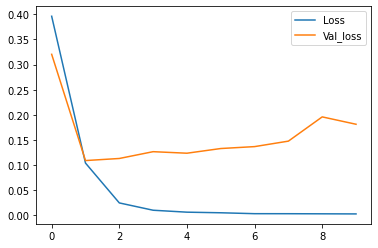

In [37]:
plt.plot(r.history['loss'], label = "Loss")
plt.plot(r.history['val_loss'], label = "Val_loss")
plt.legend()

<Figure size 432x288 with 0 Axes>

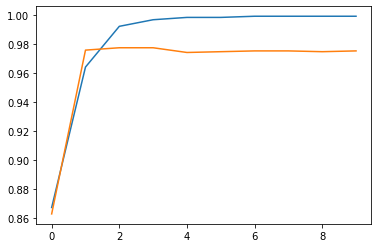

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(r.history["accuracy"], label = "Accuracy")
plt.plot(r.history['val_accuracy'], label = "Val_accuracy")
plt.figure()